<a href="https://colab.research.google.com/github/KoshiBG/Python_for_data_analysis/blob/main/Lecture_2_python_functions_classes_exceptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Функції

Ми вже бачили кілька визначених функцій, але давайте копнемо трохи глибше. Функції в Python дуже інтуїтивно зрозумілі. Почнемо з прикладу функції без параметрів:

In [1]:
# декларація функції
def hello():
    # тіло функції
    a = 10
    # те, що поверне функція
    return "This is my first function!"

Ключове слово `def` вказує на _визначення_ функції, за яким слідують ім’я та список аргументів (які ця функція не отримує). Інструкція `return` використовується, щоб перервати потік функції та повернути значення тому, хто цю функцію викликав:

In [19]:
# виклик функції
hello()

'This is my first function!'

Якщо функція явно не включає оператор `return`, Python за умовчанням поверне `None`:

In [3]:
def empty():
    x = 3

In [4]:
result = empty()
print(result)

None


Те саме буде якщо ми додамо інструкцію `return` без значення, яке ми хочемо повернути.

In [ ]:
def empty():
    x = 3
    return

In [ ]:
result = empty()
result == None

## Параметри функцій

З параметрами в Python можна зробити багато чого; включаючи визначення дефолтних (за замовченням) значень параметрів та передачу іменованих параметрів. Також параметри бувають змінні і динамічні. Але поки що ми зосередимося лише на основах. Параметри функції перераховані у визначенні функції, і вони є частиною локальної області видимості функції:

In [5]:
def add(x, y):
    return x + y

In [6]:
# передаємо аргументи функції
foo = 31
bar = 42
add(foo, bar)

73

Що відбувалось можемо прослідкувати у [візуалізаторі](https://pythontutor.com/render.html#code=def%20add%28x,%20y%29%3A%0A%20%20%20%20return%20x%20%2B%20y%0A%20%20%20%20%0Aresult%20%3D%20add%282,%203%29%0Aprint%28result%29&cumulative=false&curInstr=6&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).

### Анотації типів

Доступно починаючи з Python 3.5.

Ми можемо визначати типи як параметрів, так і значення, яке вертає функція - це поліпшує легкість її використання, адже часто ми використовуємо функції як black box:

In [13]:
?add

In [14]:
def add(x: int, y: int) -> int:
    """
    Example of docstring.
    Adds two numbers.

    :param x: first argument
    :param y: second argument

    :returns: sum of arguments
    """
    return x + y

Невеличкий офтоп - найбільш вживані типи докстрінгів - які і як вони виглядають: https://stackoverflow.com/a/24385103

Вказання типів не впливає на функціонал: ми все ще можемо передати неправильні типи. Але полегшує розуміння інтерфейсу функції:

In [11]:
add

Аби перевірити тип даних, або будь-яке інше правило, яке нам дуже потрібно аби виконувалось, можемо використати інструкцію `assert`:

In [16]:
x = 'abc'

In [18]:
assert type(x) == str

Використання в функції:

In [ ]:
def add(x: int, y: int) -> int:
    assert type(x) == int and type(y) == int
    return x + y

In [ ]:
add(14, 15)

In [ ]:
x = '15'

In [ ]:
if isinstance(x, int):
    x = x + 1
elif isinstance(x, str):
    x = int(x) + 1

### Значення параметрів за замовченням

У параметрів функції може бути значення за замовченням:

In [ ]:
def concat(name='John', surname='Johnson'):
    return name + ' ' + surname

Тоді навіть якщо ми не передали аргументів, функція відпрацює.

In [ ]:
concat()

Але параметри зі значенням за замовченням завжди ідуть після параметрів без значень за замовченням:

In [ ]:
def foo(a=15, b=10, c):
    return a + b + c

In [ ]:
def foo(c, a=15, b=10):
    return a + b + c

In [ ]:
foo(1)

### Звернення до параметрів за іменем

До параметрів можна звертатись за іменем в довільному порядку:

In [ ]:
surname = 'Holmes'
concat(surname=surname, name='Sherlock')

Але отак не можна:

In [ ]:
concat(surname='Holmes', 'Sherlock')

### Змінна кількість параметрів функції

Ми також можемо визначити функції, які приймають змінну кількість аргументів, використовуючи `*args`:

In [ ]:
def add(*args):
    return sum(args)

In [ ]:
add(*tuple(range(10)))

In [ ]:
add(1)

Змінною може бути і кількість _іменованих_ аргументів, `**kwargs`:

In [ ]:
def demo(**kwargs):
    print(kwargs)

In [ ]:
demo(name="Humpty", location="Wall", surname='Pump')

### Передача параметрів колекціями

Можемо ще передавати аргументи у функцію кортежем або масивом, якщо хочемо передати неіменовані аргументи:

In [ ]:
def list_numbers(first, second, third):
    print("First number", first)
    print("Second number", second)
    print("Third number", third)

In [ ]:
args = ["One","Two","Three"]
list_numbers(*args)

Або словником, якщо хочемо передати іменовані аргументи:

In [ ]:
kwargs = {
    "third": "Three",
    "second": "Two",
    "first": "One"
}
list_numbers(**kwargs)

## Приклад використання функцій

### Обчислення виразу

Основне призначення функцій — групувати код, який виконується кілька разів. Наприклад, нам треба порахувати наступний вираз для різних значень параметрів a, b, c:  
```(a + 1) + (b + 1) + (c + 1)```

In [ ]:
def increment(x):
    return x + 1

In [ ]:
def eval_expression(a, b, c):
    return increment(a) + increment(b) + increment(c)

In [ ]:
eval_expression(11, 12, 13)

In [ ]:
eval_expression(22, 15, 18)

Без функцій ми б писали для кожного виразу наступне:

In [ ]:
(11 + 1) + (12 + 1) + (13 + 1 )

А якщо б нам треба було зробити обчислення для 1000 трійок чисел? Ми б 1000 скопіювали той код.  
А якщо потім раптом нам би довелось внести зміну у вираз і зробити з нього наступний:
    ```(a + 1) + (b + 1) + (c + 1) + 100```
    
Нам би довелось відредагувати код в 1000 рядках. А уявіть, що кожен з цих рядків викликається в окремому файлі. Велика імовірність, що ми могли б щось десь загубити і не виправити, а потім шукати помилку.
Тож, якщо у вас один и той самий код виконується в двох місцях - вже є сенс написати функцію, аби уникнути дублювання коду.

## Стек викликів
Python запам’ятає, який рядок коду викликав функцію, щоб виконання могло повернутися туди, коли зустрінеться оператор `return`.  
Якщо ця оригінальна функція викликала інші функції, виконуються спочатку ті функції, а потім повертаємось до виконання першої функції.

In [ ]:
def a():
    print('a() starts')
    b()
    d()
    print('a() returns')

def b():
    print('b() starts')
    c()
    print('b() returns')

def c():
    print('c() starts')
    print('c() returns')

def d():
    print('d() starts')
    print('d() returns')

a()

Можемо прослідкувати виконання [тут](https://pythontutor.com/render.html#code=def%20a%28%29%3A%0A%20%20%20%20print%28'a%28%29%20starts'%29%0A%20%20%20%20b%28%29%0A%20%20%20%20d%28%29%0A%20%20%20%20print%28'a%28%29%20returns'%29%0A%0Adef%20b%28%29%3A%0A%20%20%20%20print%28'b%28%29%20starts'%29%0A%20%20%20%20c%28%29%0A%20%20%20%20print%28'b%28%29%20returns'%29%0A%0Adef%20c%28%29%3A%0A%20%20%20%20print%28'c%28%29%20starts'%29%0A%20%20%20%20print%28'c%28%29%20returns'%29%0A%0Adef%20d%28%29%3A%0A%20%20%20%20print%28'd%28%29%20starts'%29%0A%20%20%20%20print%28'd%28%29%20returns'%29%0A%0Aa%28%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).

![Unknown.jpg](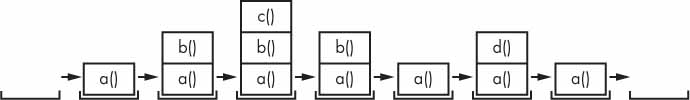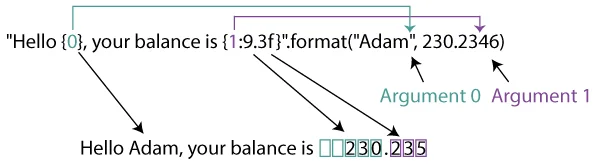)

## Глобальний і локальний області видимості

Параметри та змінні, призначені у викликаній функції, вважаються такими, що існують у локальній області видимості цієї функції.   
Кажуть, що змінні, які визначаються поза всіма функціями, існують у глобальній області видимості.   
Змінна, яка існує в локальній області, називається `локальною змінною`, тоді як змінна, яка існує в глобальній області, називається `глобальною змінною`.   
Змінна має бути або локальною, або глобальною; вона не може бути одночасно в обох областях видимості.  


Ми маємо зважати на області видимості з кількох причин:

- Код у глобальній області видимості, поза всіма функціями, не може використовувати локальні змінні будь-якої з функцій.
- Однак код у локальній області може мати доступ до глобальних змінних.
- Код у локальній області видимості функції не може використовувати змінні в будь-якій іншій локальній області видимості.
- Ви можете використовувати однакові назви для різних змінних, якщо вони знаходяться в різних областях видимості. Тобто може існувати локальна змінна з іменем `spam` і глобальна змінна з іменем `spam`.


Приклад змінної в локальній області видимостій функції:


In [ ]:
def spam():
    eggs = 12345

spam()
print(eggs)

Приклад того, що локальні області видимості не можуть використовувати змінні з інших локальних областей видимості.

In [ ]:
def spam():
    eggs = 100
    bacon()
    print(eggs)

def bacon():
    ham = 22
    eggs = 13

spam()

Приклад того, що глобальні змінні можна читати з локальної області видимості:

In [ ]:
def spam():
    print(eggs)

eggs = 54
spam()
print(eggs)

Приклад локальних та глобальних змінних з однаковими іменами:

In [ ]:
def spam():
    eggs = 'spam local'
    print(eggs)

def bacon():
    eggs = 'bacon local'
    print(eggs)
    spam()
    print(eggs)

eggs = 'global'
bacon()
print(eggs)

Можна відслідкувати виконання [тут](https://pythontutor.com/render.html#code=def%20spam%28%29%3A%0A%20%20%20%20eggs%20%3D%20'spam%20local'%0A%20%20%20%20print%28eggs%29%20%20%20%20%23%20prints%20'spam%20local'%0A%0Adef%20bacon%28%29%3A%0A%20%20%20%20eggs%20%3D%20'bacon%20local'%0A%20%20%20%20print%28eggs%29%20%20%20%20%23%20prints%20'bacon%20local'%0A%20%20%20%20spam%28%29%0A%20%20%20%20print%28eggs%29%20%20%20%20%23%20prints%20'bacon%20local'%0A%0Aeggs%20%3D%20'global'%0Abacon%28%29%0Aprint%28eggs%29%20%20%20%20%20%20%20%20%23%20prints%20'global'&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).

## Вираз `global`

Якщо вам потрібно змінити глобальну змінну всередині функції, скористайтеся оператором `global`.

In [ ]:
def spam():
    global eggs
    eggs = 'spam'

eggs = 'global'
spam()
print(eggs)

Існує чотири правила, які визначають, чи знаходиться змінна в локальній чи глобальній області видимості:

- Якщо змінна використовується в глобальній області (тобто поза всіма функціями), то це завжди глобальна змінна.
- Якщо для цієї змінної у функції є оператор `global`, це глобальна змінна.
- В іншому випадку, якщо змінна використовується в операторі присвоєння у функції, це локальна змінна.
- Але якщо змінна не використовується в операторі присвоєння, вона є глобальною змінною.

Якщо ви раптом забули ці правила, ви завжджи можете потестувати на простому прикладі те, що хочете реалізувати.

Розглянемо приклад:

In [ ]:
def spam():
    global eggs
    eggs = 'spam' # глобальна змінна

def bacon():
    eggs = 'bacon' # локальна

def ham():
    print(eggs) # глобальна

eggs = 42 # глобальна
spam()
print(eggs)
bacon()
print(eggs)
ham()
print(eggs)

Якщо ви спробуєте використати локальну змінну у функції перед тим, як присвоїти їй значення, як у наступній програмі, Python видасть вам помилку.

In [ ]:
def spam():
    print(eggs) # Помилка
    eggs = 'spam local'

eggs = 'global'
spam()

Ця помилка виникає через те, що Python бачить, що у функції `spam()` є оператор призначення для `eggs` змінної - значить вона - локальна.

# Модулі

Усі програми Python можуть викликати базовий набір функцій, які називаються вбудованими функціями, включаючи функції print(), input() і len(), які ви бачили раніше.  
Python також поставляється з набором модулів, який називається `стандартною бібліотекою`.  
Кожен модуль — це програма Python, яка містить пов’язану групу функцій, які можна використати у ваших програмах.   
Наприклад, модуль `math` має функції, пов’язані з математикою, модуль `random` — функції, пов’язані з випадковими числами, і так далі.

Перш ніж ви зможете використовувати функції в модулі, ви повинні імпортувати модуль за допомогою оператора імпорту. У коді оператор імпорту складається з наступного:

1. Ключове слово `import`
2. Назва модуля
3. Можна імпортувати кілька модулів, вказавши їх назви через кому, але зазвичай ми імпортуємо один модуль в одному рядку

Після імпорту модуля ви зможете використовувати всі цікаві функції цього модуля. Давайте спробуємо з модулем random, який надасть нам доступ до функції random.randint().

In [ ]:
import random

# на випадок, якщо ми хочемо зафіксувати ті випадкові числа, які генерують викликані функції
# random.seed(42)

for i in range(5):
    print(random.randint(1, 10))

Ось приклад оператора імпорту, який імпортує чотири різні модулі. Але зазвичай ми все ж пишемо кожен модуль в окремому рядочку.

In [ ]:
import random, sys, os, math

In [ ]:
os.cpu_count()

Тобто частіше ми будемо імпортувати наступним чином:

In [ ]:
import math
import os
import random
import sys

Порядок імпортів має значення для зручності перегляду - маємо розташовувати імпорти в алфавітному порядку. Детальніше про це - в стандарті [PEP8](https://peps.python.org/pep-0008/#imports).

Ще один важливий момент. Імпорти як ви вже зрозуміли, можуть бути в будь-якому місці кода. Але прийнято всі імпорти розташувати вверху файла (.ipynb чи .py). Іноді ми можемо захотіти імпортувати модуль всередині функції, якщо він більше ніде не використовується і функція викликається рідко. Але на початкових етапах можна просто писати всі імпорти вверху.

## Інструкція from
Альтернативна форма оператора `import` складається з ключового слова `from`, за яким слідує назва модуля, ключове слово `import` і зірочка або назви функцій і класів, які ви хочете імпортувати.

In [ ]:
from random import *

In [ ]:
randint(1, 1000)

З цією формою оператора імпорту виклики функцій модуля `random` не потребуватимуть `random.` префіксу. Однак використання повного імені робить код більш читабельним, бо ми розуміємо, звідки взялась та функція, тому краще використовувати `import random` або прописувати явно назву функції в імпорті:

In [ ]:
from random import randint

## Приклад функції з використанням модуля

In [ ]:
import random

def get_answer(answer_number):
    if answer_number == 1:
        return 'Так'
    elif answer_number == 2:
        return 'Навряд чи'
    elif answer_number == 3:
        return 'Ні'
    elif answer_number == 4:
        return 'Спробуй ще раз пізніше'
    elif answer_number == 5:
        return '90% що так'
    elif answer_number == 6:
        return 'Сконцентруйся і спробуй ще раз'
    elif answer_number == 7:
        return 'Умови не сприяють'
    elif answer_number == 8:
        return 'Можливо'
    elif answer_number == 9:
        return 'Дуже навряд чи'

r = random.randint(1, 9)
print('Твій номер: ', r)
fortune = get_answer(r)
print('Моя відповідь: ', fortune)

# Винятки (Exceptions)

Винятки виникають під час виконання, коли у вашій програмі виникає ненормальна ситуація. Винятки також можуть бути створені та викликані вашим кодом. Приклад винятку:

In [ ]:
age = "31"

In [ ]:
if age > 21:
    print("Вхід дозволено.")

Винятки можна обробляти під час виконання за допомогою блоку `try/except`:

In [ ]:
try:
    if age > 21:
        print("Вхід дозволено.")
except:
    print("Щось пішло не так.")

Частина `except` також може бути параметризована з очікуваним винятком:

In [ ]:
try:
    if age > 21:
        print("Вхід дозволено.")
except TypeError:
    print("Щось пішло не так.")

Але в такому випадку ми ловимо тільки визначені винятки. Приклад:

In [ ]:
def spam(divide_by):
    return 42 / divide_by

try:
    print(spam(2))
    print(spam(12))
    print(spam(0))
    print(spam(1))
except TypeError as e:
    print(str(e))

Не відловився виняток, бо ми відклювлювали інший тип.

Також, зверніть увагу, що програма виконується до першого винятка, а потім зупиняється. Аби це обійти і зробити так аби для всіх даних виконалась обробка, треба обробку винятків перенести в саму функцію.

In [ ]:
def spam(divide_by):
    try:
        return 42 / divide_by
    except ZeroDivisionError:
        print('Error: Invalid argument.')


print(spam(2))
print(spam(12))
print(spam(0))
print(spam(1))

# Класи

Python є об'єктно-орієнтованою мовою програмування.  
Майже все в Python є об’єктом зі своїми властивостями та методами.  
Клас схожий на конструктор об’єктів або "схему" чи "шаблон" для створення об’єктів.

Створювати класи дуже просто:

In [ ]:
class MyClass:
    x = 5

In [ ]:
class_instance = MyClass()
class_instance.x

In [ ]:
type(class_instance)

## Init метод

Усі класи мають функцію під назвою `__init__()`, яка завжди виконується, коли клас ініціюється.

Використовуйте функцію `__init__()`, щоб присвоїти значення властивостям об’єкта або іншим операціям, які необхідно виконувати під час створення об’єкта:

In [ ]:
class User:
    def __init__(self, user_id, n_days, total_amount_usd):
        self.user_id = user_id
        self.n_days = n_days
        self.total_amount_usd = total_amount_usd

In [ ]:
user_1 = User("12345", 32, 998)

In [ ]:
user_1.user_id, user_1.n_days, user_1.total_amount_usd

Зверніть увагу, ми можемо створити і такий _екземпляр_ класу, але його _атрибути_ тоді не мають сенсу з точки зору типів даних:

In [ ]:
user_2 = User("99999", "abc", "ehd")

In [ ]:
user_2.n_days, user_2.total_amount_usd

Але ми можемо перевіряти типи даних на вході, або в методах класу, аналогічно до перевірки типів даних в фукнції.

## Методи класу

In [ ]:
class User:
    def __init__(self, user_id, n_days, total_amount_usd):
        self.user_id = user_id
        self.n_days = n_days
        self.total_amount_usd = total_amount_usd

    def get_segment(self): # self - завжди в методах класів
        self.segment = 'Just an ordinary client.'
        if self.n_days > 30 and self.total_amount_usd > 1000:
            self.segment = 'Best client ever.'
        return self

In [ ]:
user_1 = User("12345", 32, 998)

In [ ]:
user_1.get_segment()
user_1.segment

In [ ]:
user_2 = User("12345", 32, 10003)
user_2.get_segment()
user_2.segment

## Наслідування

In [ ]:
class MarketingUser(User):
    def __init__(self, user_id, n_days, total_amount_usd, traffic_source):
        super().__init__(user_id, n_days, total_amount_usd)
        self.traffic_source = traffic_source

    def get_segment(self): # self - завжди в методах класів
        self.segment = 'paid'
        if self.traffic_source == 'google':
            self.segment = 'organic'
        return self

In [ ]:
# змініть останній аргумент на ʼgoogle'
user_2 = MarketingUser("12121", 40, 123, 'google')

In [ ]:
user_2.__dict__

In [ ]:
print(user_2)

In [ ]:
user_2.get_segment().segment

In [ ]:
user_2.user_id

# Форматування рядків

## Старий стиль

In [ ]:
name = 'Bob'
age = 12

In [ ]:
print('Hello, %s, your age is %d.' % (name, age))

In [ ]:
'%(language)s has %(number)08d quote types.' %  {"language": "Python", "number": 2}

## Новіший стиль

In [ ]:
'Hello, {1}, your age is {0}.'.format(name, age)

Для неіменованих аргументів працює наступним чином:

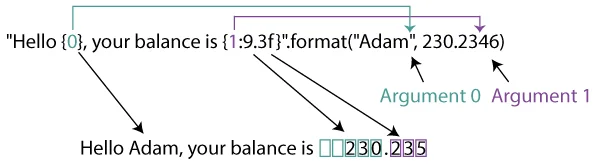

Форматувати числа з плаваючою комою можемо наступним чином:

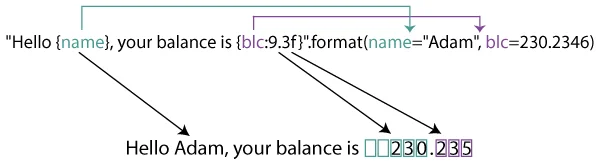

In [ ]:
# аргументи за замовченням
print("Hello {}, your balance is {}.".format("Adam", 230.2346))

# позиційні аргументи
print("Hello {0}, your balance is {1}.".format("Adam", 230.2346))

# іменовані аргументи
print("Hello {name}, your balance is {blc}.".format(name="Adam", blc=230.2346))

# змішані аршументи
print("Hello {0}, your balance is {blc}.".format("Adam", blc=230.2346))

Форматування цифр:

In [ ]:
# integer arguments
print("The number is: {:d}".format(123))

# float arguments
print("The float number is: {:.2f}".format(123.4567898))

# octal, binary and hexadecimal format
print("bin: {0:b}, oct: {0:o}, hex: {0:x}".format(12))

Можемо до форматування додати паддінг:

In [ ]:
# мінімальна ширина вікна для числа
print("{:5d}".format(12))

# встановлення ширини вікна не спрацює, якщо передане число більше за встановлене обмеження
print("{:2d}".format(1234))

# падінг для чисел з плаваючою комою
print("{:8.3f}".format(12.2346))

# заповенння нулями для цілих чисел
print("{:05d}".format(12))
print("{:05d}".format(1112))
print("{:05d}".format(1))

# заповенння нулями для чисел з плаваючою комою
print("{:08.3f}".format(12.2346))

## Найновіший стиль - інтерполяція рядків
Доступна в Python 3.6+

In [ ]:
f'Hello, {name}!'

In [ ]:
a = 5
b = 10
result = 2 * (a + b) / 128
f'Five plus ten is {a + b} and not {result}.'

Так само можемо додати форматування для чисел:

In [ ]:
f'Five plus ten is {a + b:5d} and not {2 * (a + b):.2f}.'


# На цьому ми завершуємо наше інтро в Python

Цих основ достатньо аби працювати з даними, але в Python є ще багато крутих фішок!   

Перше джерело для їх пізнання - це офіційна документація: https://docs.python.org/3/tutorial/index.html  

Також для глибшого освоєння Python рекомендую наступні книжки:

1. Ерік Маттес "Пришвидшений курс Python. Практичний, проєктно-орієнтований вступ до програмування" - є в паперовому варіанті [українською](https://www.yakaboo.ua/ua/prishvidshenij-kurs-python.html?gclid=Cj0KCQjw48OaBhDWARIsAMd966BbY4d88QXaqHB_7Ho_bRMYFCsacaP2RtHUA1JrbvGfh825gD7daJ0aAhfmEALw_wcB),   
    в електронному варіанті можна знайти англійською (Eric Matthes "Python Crash Course") - [PDF](https://drive.google.com/file/d/1pYe093khxPKuR_HSfkvi3uRCDPX4j1WB/view?usp=sharing) для ознайомлення.
    До цієї книги доступні ресурси на [гітхабі](https://github.com/ehmatthes/pcc).

2. Марк Лутц "Вивчаємо Python" - на жаль, немає перекладу на українську, але книга крута, пропоную вам оглянути
[PDF](https://drive.google.com/file/d/1jokyD_girqnc5rCWC2T0RZK2T3G6numm/view?usp=sharing) версію англійською.

Також багато корисного з розбивкою по темам можна знайти на цьому сайті:
https://www.geeksforgeeks.org/python-programming-language/?ref=shm